In [1]:
# Funciones para graficar
import matplotlib.pyplot as plt
import numpy as np

def graficar_juntas(
    t1, y1, t2, y2, titulo="Gráfica conjunta", limites_x=None, limites_y=None
):
    plt.figure(figsize=(6, 4))
    plt.plot(t1, y1, label="Función 1")
    plt.plot(t2, y2, label="Función 2")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.title(titulo)
    plt.grid(True)
    plt.axhline(0, color="black", linewidth=1)
    plt.axvline(0, color="black", linewidth=1)
    if limites_x is not None:
        plt.xlim(limites_x)
    if limites_y is not None:
        plt.ylim(limites_y)
    plt.legend()
    plt.show()


def graficar_varios(graficas, layout, limites_x = None, limites_y = None):
    m, n = layout
    total = len(graficas)
    
    fig, axs = plt.subplots(m, n, figsize=(5*n, 4*m))
    axs = axs.flatten() if total > 1 else [axs]  # Por si hay un solo gráfico

    for i, (t, y, titulo) in enumerate(graficas):
        if i >= m * n:
            print("Advertencia: más gráficos que subplots disponibles.")
            break
        axs[i].plot(t, y, label=titulo)
        axs[i].set_title(titulo)
        axs[i].set_xlabel('t')
        axs[i].set_ylabel('y')
        axs[i].grid(True)
        axs[i].axhline(0, color='black', linewidth=1)
        axs[i].axvline(0, color='black', linewidth=1)
        axs[i].set_xlim(limites_x if limites_x else (min(t), max(t)))
        axs[i].set_ylim(limites_y if limites_y else (min(y), max(y)))
        axs[i].legend()

    # Oculta los subplots vacíos si hay
    for j in range(len(graficas), m * n):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

def mostrar_3d(matriz):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection="3d")
    x = np.arange(matriz.shape[0])
    y = np.arange(matriz.shape[1])
    x, y = np.meshgrid(x, y)
    z = matriz.values.T
    ax.view_init(elev=30, azim=ax.azim - 10)

    ax.plot_surface(x, y, z, cmap="viridis", edgecolor="k")
    ax.set_xlabel("Offset X")
    ax.set_ylabel("Offset Y")
    ax.set_zlabel("Error Cuadrático")
    ax.set_xticks(range(matriz.shape[0]))
    ax.set_xticklabels(matriz.index)
    ax.set_yticks(range(matriz.shape[1]))
    ax.set_yticklabels(matriz.columns)
    plt.title("Error Cuadrático en 3D")
    plt.show()


def mostrar_diagrama_barras(valores, titulo, limites_x=None, limites_y=None):
    # Crear el gráfico de barras
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, 11), valores)
    plt.xlabel("Índice i")
    plt.ylabel("Producto Interno")
    plt.title(titulo)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(range(1, 11))  # Acá está la línea clave
    plt.xlim(limites_x if limites_x else (0, len(valores) + 1))
    plt.ylim(limites_y if limites_y else (min(valores), max(valores) * 1.1))
    plt.tight_layout()
    plt.show()

In [2]:
# Funciones para generar señales 
import numpy as np

def señal_senoidal(longitud, frecuencia_senoidal, frecuencia_muestreo = 10, fase = 0, amplitud=1):
    Ts = 1 / frecuencia_muestreo  # Período de muestreo
    tiempo = np.arange(0, longitud, Ts)  # Instantes de muestreo
    y = (
        np.sin(2 * np.pi * frecuencia_senoidal * tiempo + fase) * amplitud
    )  # Señal muestreada
    return tiempo, y


def señal_rampa(longitud, amplitud, frecuencia_muestreo):
    Ts = 1 / frecuencia_muestreo  # Período de muestreo
    tiempo = np.arange(0, longitud + Ts, Ts)  # Instantes de muestreo
    y = tiempo * (amplitud / longitud)  # Señal rampa
    return tiempo, y


def señal_cuadrada(longitud, amplitud, frecuencia_periodo, frecuencia_muestreo):
    Ts = 1 / frecuencia_muestreo  # Período de muestreo
    tiempo = np.arange(0, longitud, Ts)  # Instantes de muestreo
    y = np.where(
        (tiempo % frecuencia_periodo) < (frecuencia_periodo / 2), amplitud, 0
    )
    return tiempo, y


def señal_aleatoria(longitud, amplitud, frecuencia_muestreo):
    Ts = 1 / frecuencia_muestreo  # Período de muestreo
    tiempo = np.arange(0, longitud, Ts)  # Instantes de muestreo
    y = np.random.uniform(-amplitud, amplitud, len(tiempo))  # Señal aleatoria
    return tiempo, y

In [3]:
# Info de una señal
import numpy as np
import pandas as pd

def analizar_senal(t, y):
    dt = t[1] - t[0]
    intervalo = t[-1] - t[0]
    cantidad_muestras = len(t)

    valor_medio = np.mean(y)
    maximo = np.max(y)
    minimo = np.min(y)
    amplitud = np.max(np.abs(y))
    energia = np.sum(y**2) * dt # Norma 2 al cuadrado * dt
    accion = np.sum(np.abs(y)) * dt  # Norma 1 * dt
    potencia_media = energia / intervalo
    rms = np.sqrt(np.mean(y**2))

    return [
        valor_medio,
        maximo,
        minimo,
        amplitud,
        energia,
        accion,
        potencia_media,
        rms,
    ]


def mostrar_analisis(graficas):
    nombres = []
    senales = []

    for i, (t, y, titulo) in enumerate(graficas):
        nombres.append(titulo)
        senales.append((t, y))

    # Cálculos
    datos = [analizar_senal(t, y) for t, y in senales]

    # Crear DataFrame
    columnas = [
        "Valor medio",
        "Máximo",
        "Mínimo",
        "Amplitud",
        "Energía",
        "Acción",
        "Potencia media",
        "RMS",
    ]

    tabla = pd.DataFrame(datos, columns=columnas, index=nombres)
    tabla = tabla.round(3)

    return tabla

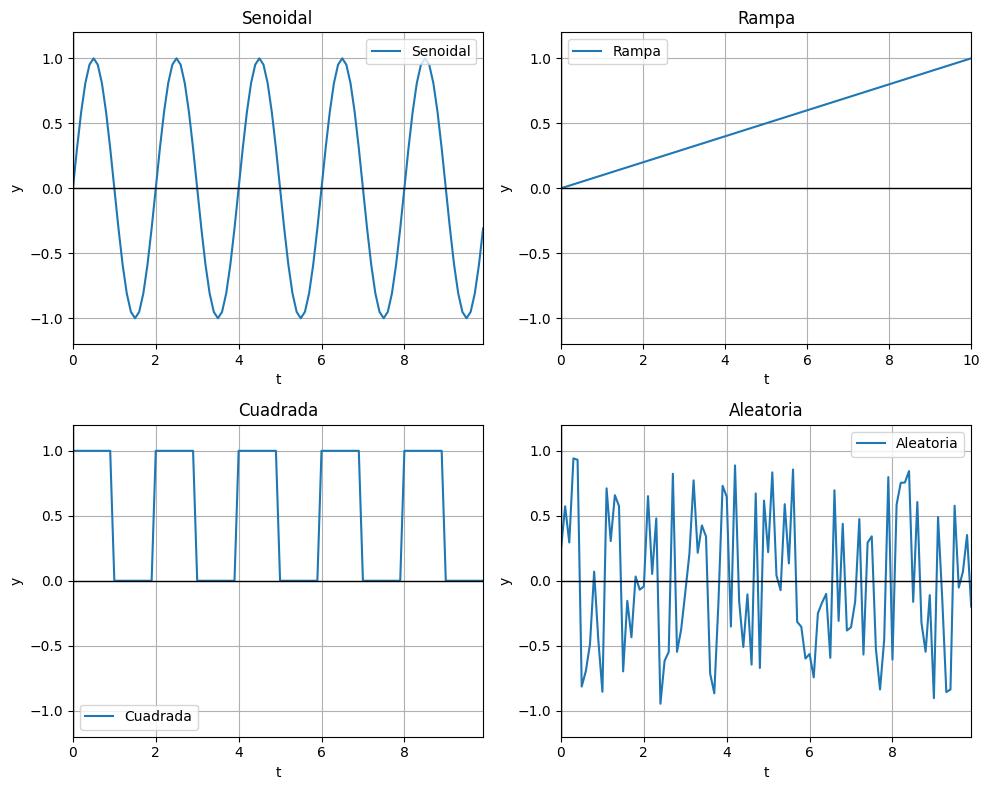

,Valor medio,Máximo,Mínimo,Amplitud,Energía,Acción,Potencia media,RMS
Senoidal,0.000,1.000,-1.000,1.000,5.000,6.314,0.505,0.707
Rampa,0.500,1.000,0.000,1.000,3.384,5.050,0.338,0.579
Cuadrada,0.500,1.000,0.000,1.000,5.000,5.000,0.505,0.707
Aleatoria,-0.005,0.942,-0.946,0.946,2.989,4.771,0.302,0.547


In [4]:
# Ejercicio 1
t_aprox_best, y_aprox_best = señal_senoidal(10, 0.5, 10, 0)
t_rampa, y_rampa = señal_rampa(10, 1, 10)
t_cuadrada, y_cuadrada = señal_cuadrada(10, 1, 2, 10)
t_aleatoria, y_aleatoria = señal_aleatoria(10, 1, 10)

graficar_varios(
    [
        [t_aprox_best, y_aprox_best, "Senoidal"],
        [t_rampa, y_rampa, "Rampa"],
        [t_cuadrada, y_cuadrada, "Cuadrada"],
        [t_aleatoria, y_aleatoria, "Aleatoria"],
    ],
    (2, 2),
    limites_y=(-1.2,1.2)
)
tabla = mostrar_analisis(
    [
        [t_aprox_best, y_aprox_best, "Senoidal"],
        [t_rampa, y_rampa, "Rampa"],
        [t_cuadrada, y_cuadrada, "Cuadrada"],
        [t_aleatoria, y_aleatoria, "Aleatoria"],
    ]
)

tabla

In [5]:
# Funciones para calcular similitudes
import numpy as np

def producto_interno(t, y1, y2):
    dt = t[1] - t[0]  # Suponiendo que t está uniformemente muestreado
    return np.sum(y1 * y2) * dt


# def norma(y, dt):
#     return np.sqrt(np.sum(y**2) * dt)


# def similitud_coseno(t, y1, y2):
#     dt = t[1] - t[0]  # Suponiendo que t está uniformemente muestreado
#     return producto_interno(t, y1, y2) / (norma(y1, dt) * norma(y2, dt))

In [6]:
# Ejercicio 2
from ipywidgets import interact, FloatSlider

def graficar_interactivo(fase, amplitud, frecuencia):
    longitud = 10
    fm = 20  # frecuencia de muestreo

    t, y1 = señal_senoidal(longitud, 0.5, fm, 0, 1)  # señal fija
    _, y2 = señal_senoidal(
        longitud, frecuencia, fm, fase, amplitud
    )  # señal modificable

    pi = producto_interno(t, y1, y2)

    plt.figure(figsize=(10, 4))
    plt.plot(t, y1, label="Señal 1 (fija)")
    plt.plot(t, y2, label="Señal 2 (ajustable)")
    plt.ylim(-1.2, 1.2)
    plt.title(f"Producto Interno: {pi:.2f}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interfaz interactiva
interact(
    graficar_interactivo,
    fase=FloatSlider(min=0, max=2 * np.pi, step=0.01, value=0, description="Fase"),
    amplitud=FloatSlider(min=0.1, max=2.0, step=0.01, value=1, description="Amplitud"),
    frecuencia=FloatSlider(
        min=0.1, max=2.0, step=0.01, value=0.5, description="Frecuencia"
    ),
)

interactive(children=(FloatSlider(value=0.0, description='Fase', max=6.283185307179586, step=0.01), FloatSlide…

<function __main__.graficar_interactivo(fase, amplitud, frecuencia)>

In [7]:
# Funciones para generar señales legendre ej 3

# funcion -1 para t<0 y 1 para t>0
def funcion_original(frecuencia_muestreo):
    Ts = 1 / frecuencia_muestreo  # Período de muestreo
    tiempo = np.arange(-1, 1, Ts)  # Instantes de muestreo
    y = np.sign(tiempo)
    return tiempo, y


# legendre para la funcion -1/1 del ejercicio
def legendre_4(frecuencia_muestreo, offset_coeficientes):
    Ts = 1 / frecuencia_muestreo  # Período de muestreo
    tiempo = np.arange(-1, 1, Ts)  # Instantes de muestreo
    y = (45 / 16 + alfas[0] * offset_coeficientes[0]) * tiempo - (
        35 / 16 + offset_coeficientes[1]
    ) * tiempo**3
    return tiempo, y


# legendre para la funcion -1/1 del ejercicio
def legendre_6(frecuencia_muestreo):
    Ts = 1 / frecuencia_muestreo  # Período de muestreo
    tiempo = np.arange(-1, 1, Ts)  # Instantes de muestreo
    y = (45 / 16) * tiempo - (35 / 16) * tiempo**3 + (11 / 128) * (63 * tiempo**5 - 70 * tiempo**3 + 15 * tiempo)
    return tiempo, y


def error_cuadratico(y1,y2,dt):
    return np.sum((y1 - y2) ** 2) * (
                dt
            )


def generar_matriz_errores_legendre_4(y_original, fm):
    matriz_valores = []
    for i in range(5):
        for j in range(5):
            offset = np.array([i - 2, j - 2]) * 0.1
            t_legendre, y_legendre = legendre_4(fm, offset)

            error = error_cuadratico(
                y_original, y_legendre, t_legendre[1] - t_legendre[0]
            )

            matriz_valores.append(error)

    # Matriz de errores con distintos offsets
    df_matriz_valores = pd.DataFrame(
        np.array(matriz_valores).reshape(5, 5),
        columns=[f"Offset Y {(j-2)*0.1}" for j in range(5)],
        index=[f"Offset X {(i-2)*0.1}" for i in range(5)],
    )
    return df_matriz_valores

In [8]:
# Ejercicio 3

fm = 20
t_original, y_original = funcion_original(fm)
t_aprox_best, y_aprox_best = legendre_4(fm, (0, 0))

graficar_juntas(
    t_original,
    y_original,
    t_aprox_best,
    y_aprox_best,
    titulo="Aproximación de Legendre\nError cuadrático: {:.2f}".format(
        error_cuadratico(
            y_original, y_aprox_best, t_aprox_best[1] - t_aprox_best[0]
        )
    ),
    limites_y=(-1.2, 1.2),
)

matriz_valores = generar_matriz_errores_legendre_4(y_original, fm)

mostrar_3d(matriz_valores)

t_aprox_best_6, y_aprox_best_6 = legendre_6(fm)
graficar_juntas(
    t_original,
    y_original,
    t_aprox_best_6,
    y_aprox_best_6,
    titulo="Aproximación de Legendre\nError cuadrático: {:.2f}".format(
        error_cuadratico(
            y_original, y_aprox_best_6, t_aprox_best_6[1] - t_aprox_best_6[0]
        )
    ),
    limites_y=(-1.2, 1.2),
)

matriz_valores

NameError: name 'alfas' is not defined

In [ ]:
# Funciones para generar señales senoidales ej 4

def S(fs, t):
    return K(fs,0,t)

def K(fs, fase, t):
    return np.sin(2 * np.pi * fs * t + fase)

In [ ]:
# Ejercicio 4

from ipywidgets import interactive, FloatSlider, VBox
import numpy as np


inciso = 2
graficar_funciones = False

fm = 150
Ts = 1 / fm 
longitud = 2
t = np.arange(0, longitud, Ts)
fase = np.pi / 1

alfas = [
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
]
sliders = {
    f"alfa{i+1}": FloatSlider(
        value=alfas[i], min=-2, max=2, step=0.01, description=f"α{i+1}"
    )
    for i in range(len(alfas))
}
sliders["fase"] = FloatSlider(
    value=fase, min=0, max=2 * np.pi, step=0.01, description="Fase"
)


# @interact(fase=FloatSlider(value=0, min=0, max=2 * np.pi, step=0.01))
def actualizar_diagrama(fase, **kwargs):
    alfas_actuales = [kwargs[f"alfa{i+1}"] for i in range(10)]
    productos = []

    if inciso == 1:
        señal_test = sum(alfas_actuales[i] * S(i + 1, t) for i in range(10))
    elif inciso == 2:
        señal_test = sum(alfas_actuales[i] * K(i + 1, fase, t) for i in range(10))
    elif inciso == 3:
        _, señal_test = señal_cuadrada(longitud, 1, 2, fm)
    else:
        return

    for i in range(1, 11):  # Usamos la fase en S
        prod = producto_interno(t, S(i, t), señal_test)
        productos.append(prod)
        if graficar_funciones:
            graficar_juntas(
                t,
                S(i, t),
                t,
                señal_test,
                titulo=f"Producto interno: {prod:.2f}",
                # limites_y=(-1.2, 1.2),
            )

    mostrar_diagrama_barras(
        productos, titulo=f"Producto interno vs frecuencia - Fase={fase:.2f} rad"
    )


# Crear el widget interactivo
ui = interactive(actualizar_diagrama, **sliders)
display(VBox([ui]))

In [ ]:
# Ejercicio 5

te = np.loadtxt(r"TP 3 - datasets\te.txt")

t = np.arange(0, len(te))

rangos = [
    (17500, 21500),
    (30000, 34500),
    (40000, 43000),
    (48500, 53000),
    (59000, 63500),
    (71000, 74400),
    (81000, 85500),
]

# graficar_varios(
#     [
#         [t, te, "1"],
#         [t[rangos[0][0] : rangos[0][1]], te[rangos[0][0] : rangos[0][1]], "1"],
#         [t[rangos[1][0] : rangos[1][1]], te[rangos[1][0] : rangos[1][1]], "2"],
#         [t[rangos[2][0] : rangos[2][1]], te[rangos[2][0] : rangos[2][1]], "3"],
#         [t[rangos[3][0] : rangos[3][1]], te[rangos[3][0] : rangos[3][1]], "4"],
#         [t[rangos[4][0] : rangos[4][1]], te[rangos[4][0] : rangos[4][1]], "5"],
#         [t[rangos[5][0] : rangos[5][1]], te[rangos[5][0] : rangos[5][1]], "6"],
#         [t[rangos[6][0] : rangos[6][1]], te[rangos[6][0] : rangos[6][1]], "7"],
#     ],
#     (3, 3),
#     limites_y=(-2, 2),
# )

iteraciones = 20
mejores_productos_verticales = []
frecuencias_verticales = [697, 770, 852, 941]
for i in range(len(rangos)):
    
    if i == 0:
        mejores_productos_verticales.append([0, 0, 0])
    
    for j in range(4):
        for k in range(iteraciones):
            fase = (k / iteraciones) * 2 * np.pi
            t, y = señal_senoidal(
                longitud=rangos[i][1] - rangos[i][0],
                frecuencia_senoidal=frecuencias_verticales[j],
                frecuencia_muestreo=1,
                amplitud=1,
                fase=fase,
            )

            producto = producto_interno(
                t,
                y,
                te[rangos[i][0] : rangos[i][1]],
            )
            if producto > mejores_productos_verticales[i][1]:
                mejores_productos_verticales[i][0] = j
                mejores_productos_verticales[i][1] = producto
                mejores_productos_verticales[i][2] = fase

print(mejores_productos_verticales)


frecuencias_horizontales = [1209, 1336, 1477]

IndexError: list index out of range